In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import operator

Coaches = pd.read_json('coaches/coaches.json')
Players = pd.read_json('players/players.json',encoding = "utf-8")
Events = pd.read_json('events/events_England.json')
Teams = pd.read_json('teams/teams.json')
Matches = pd.read_json('matches/matches_England.json')

In [37]:
# CREATE CRQ1_df DataFrame with only goals event with playerId,teamId, 'matchPeriod', 'eventSec'
CRQ1_df = Events[['tags', 'playerId', 'teamId', 'matchPeriod', 'eventSec']]

CRQ1_list = [] # list contain the row with 101 tag
for x in range(len(Events['tags'])):
    if {'id': 101} in CRQ1_df.tags[x]:
        CRQ1_list.append(CRQ1_df.iloc[x]) # append row with 101 tag at CRQ1_list
CRQ1_df = pd.DataFrame(CRQ1_list) # dataset with only goals event
CRQ1_df.index = range(len(CRQ1_df.index)) # set index
CRQ1_df = CRQ1_df[['playerId','teamId','matchPeriod', 'eventSec']] # remove column 'tag'

In [41]:
# Divide time to interval
import intervals as I
CRQ1_df['matchPeriod'].to_string
pd.set_option('mode.chained_assignment', None)
for x in range(len(CRQ1_df['eventSec'])):
    if CRQ1_df['matchPeriod'][x] == '1H':
        if (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(0,9):
            CRQ1_df['matchPeriod'].iloc[x] = '[0-09)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(9,18):
            CRQ1_df['matchPeriod'].iloc[x] = '[09-18)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(18,27):
            CRQ1_df['matchPeriod'].iloc[x] = '[18-27)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(27,36):
            CRQ1_df['matchPeriod'].iloc[x] = '[27-36)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(36,45):
            CRQ1_df['matchPeriod'].iloc[x] = '[36-45)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) >= 45:
            CRQ1_df['matchPeriod'].iloc[x] = '[45+)'
    elif CRQ1_df['matchPeriod'][x] == '2H':
        if (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(0,9):
            CRQ1_df['matchPeriod'].iloc[x] = '[45-54)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(9,18):
            CRQ1_df['matchPeriod'].iloc[x] = '[54-63)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(18,27):
            CRQ1_df['matchPeriod'].iloc[x] = '[63-72)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(27,36):
            CRQ1_df['matchPeriod'].iloc[x] = '[72-81)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(36,46):
            CRQ1_df['matchPeriod'].iloc[x] = '[81-90)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) >= 45:
            CRQ1_df['matchPeriod'].iloc[x] = '[90+)'
    elif CRQ1_df['matchPeriod'][x] == 'E1':
         CRQ1_df['matchPeriod'].iloc[x] = '[45+)'
    elif CRQ1_df['matchPeriod'][x] == 'E2':
         CRQ1_df['matchPeriod'].iloc[x] = '[90+)'
    else:
        pass


In [42]:
CRQ1_df = CRQ1_df[['playerId','teamId','matchPeriod']] # delete 'eventSec'

In [49]:
# Sorted intervl period and count numbers of same interval
interval = sorted(list(set(list(CRQ1_df['matchPeriod']))))
count_interval = []
for x in interval:
    count_interval.append(len(CRQ1_df[CRQ1_df['matchPeriod']==x]))

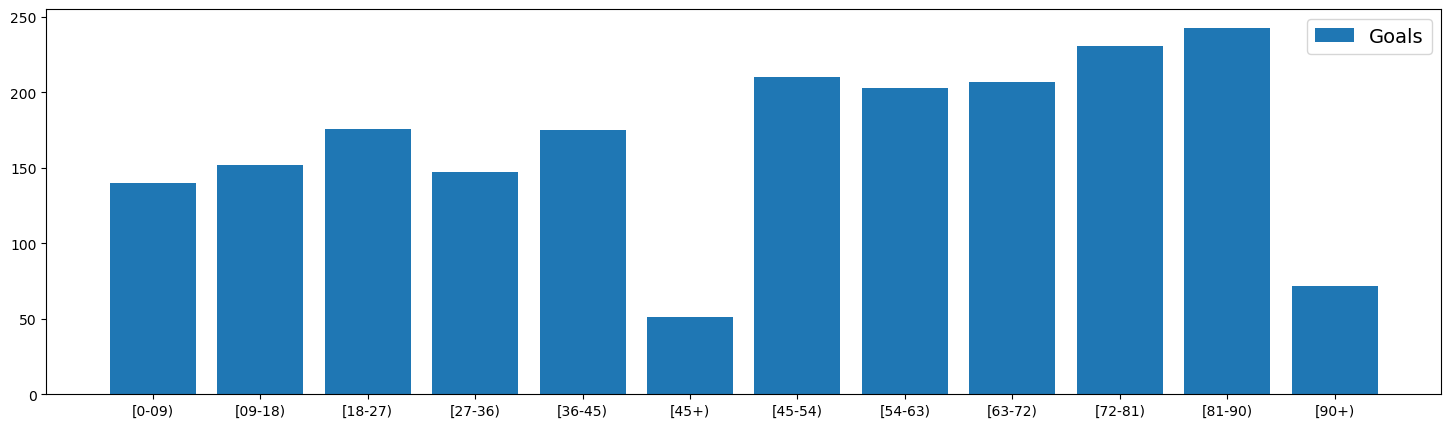

In [111]:
# Show bar plot
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(interval, count_interval, label = 'Goals')

ax.legend(fontsize = 14)
plt.show()

In [76]:
# Create DataFrame by interval of 81-90 and sorted it
Team_81_90 =CRQ1_df[CRQ1_df['matchPeriod']=='[81-90)']
team_81_90 = sorted(list(set(list(Team_81_90['teamId']))))

In [81]:
# count numbers of goals in interval of 81-90 for each team
count_team_81_90 = {}
for x in team_81_90:
    count_team_81_90.update({x:len(Team_81_90[Team_81_90['teamId']==x])})

In [115]:
# sorted dictionary of teams and goals number by goal numbers
count_team_81_90
sorted_count_team_81_90 = sorted(count_team_81_90.items(), key=operator.itemgetter(1))

In [114]:
#create a list team for find the top 10 teams score the most in interval 81-90
list_Teams=[]
for x in sorted_count_team_81_90[-10:]:
    list_Teams.append(x[0])

In [116]:
#top 10 teams score the most in interval 81-90
for x in list_Teams:
    print(Teams[Teams['wyId']==x]['officialName'].iloc[0])

Manchester United FC
Everton FC
AFC Bournemouth
Chelsea FC
Liverpool FC
Crystal Palace FC
West Ham United FC
Arsenal FC
Manchester City FC
Watford FC


In [117]:
#create a sorted list of player id and find players that were able to score at least one goal in 8 different intervals.
list_player = sorted(list(set(list(CRQ1_df['playerId']))))
player_8_different_interval=[]
for x in list_player:
    if len(set(list(CRQ1_df[CRQ1_df['playerId']==x]['matchPeriod'])))>=8:
        player_8_different_interval.append(x)
for x in player_8_different_interval:#range(len(Teams)):
    print(Players[Players['wyId']==x]['shortName'].iloc[0])

\u00c1lvaro Morata
T. Courtois
Adri\u00e1n
\u0141. Fabia\u0144ski
P. \u010cech
R. Lukaku
David de Gea
R. Elliot
J. Butland
Gomes
J. Hart
B. Foster
J. Speroni
W. Zaha
W. Hennessey
K. Schmeichel
S. Mignolet
A. McCarthy
H. Kane
A. Begovi\u0107
J. Pickford
R. Sterling
N. Pope
J. Vardy
M. Arnautovi\u0107
L. Karius
Roberto Firmino
H. Lloris
A. Lacazette
R. Mahrez
J. L\u00f6ssl
M. Ryan
F. Forster
Ederson
O. Karnezis
Mohamed Salah
Gabriel Jesus


In [ ]:
import json
from pandas.io.json import json_normalize

with open('./Germany_Korea.json') as data_file:    
    data = json.load(data_file)
df = json_normalize(data, sep = "_")

In [15]:
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

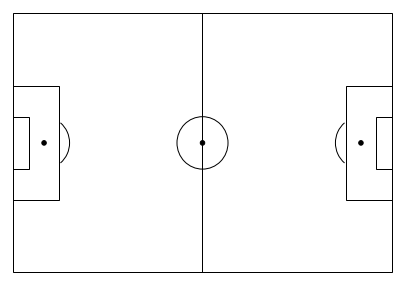

In [16]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()

In [ ]:
# loading the json file
ozil_pass = df[(df['type_name'] == "Pass") & (df['player_name']=='Mesut Özil')] # get passing information of Ozil
pass_column = [i for i in df.columns if i.startswith("pass")]
ozil_pass = ozil_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]

In [ ]:
for i in range(len(ozil_pass)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (ozil_pass.iloc[i]['pass_end_location'][0], ozil_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (ozil_pass.iloc[i]['location'][0], ozil_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)

NameError: name 'ozil_action' is not defined

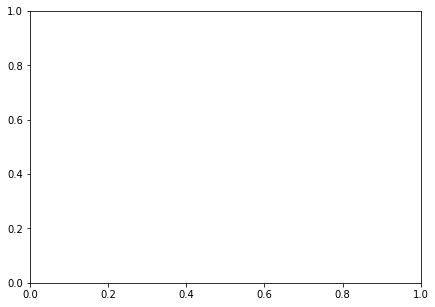

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

x_coord = [i[0] for i in ozil_action["location"]]
y_coord = [i[1] for i in ozil_action["location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()